In [1]:
import re
import networkx as nx
import pandas as pd

In [2]:
df = pd.read_csv('data/fourth_revolution.csv', encoding='cp949')
posts = df.get('Title') + " " + df.get('Description')
date = df.get('Post Date')

In [3]:
from eunjeon import Mecab
tagger = Mecab()
#불용어 발견할 때마다 추가할 예정이다.
stop_words = "4 은 이 것 등 더 를 차 수 년"
stop_words = stop_words.split(' ')
stop_words[0:10]

['4', '은', '이', '것', '등', '더', '를', '차', '수', '년']

In [4]:
#명사 추출
nouns = []
for post in posts :
    for noun in tagger.nouns(post) :
        if noun not in stop_words :
            nouns.append(noun)
nouns[0:10]

['산업', '혁명', '의료', '기술', '과목', '산업', '혁명', '정의', '무엇', '구현']

In [5]:
from collections import Counter
num_top_nouns = 20
noun_counter = Counter(nouns)
top_nouns = dict(noun_counter.most_common(num_top_nouns))
top_nouns

{'산업': 3500,
 '혁명': 3059,
 '시대': 801,
 '기술': 531,
 '미래': 301,
 '교육': 293,
 '변화': 218,
 '정보': 192,
 '인공지능': 192,
 '데이터': 173,
 '핵심': 170,
 '직업': 164,
 '우리': 161,
 '분야': 149,
 '융합': 141,
 '스마트': 137,
 '사회': 118,
 '인터넷': 116,
 '디지털': 115,
 '빅': 114}

In [6]:
sentences = []
for post in posts :
    sentences.extend(re.split('; |\.|\?|\!', post))
sentences[0:10]

['4차산업혁명(4IR)과 의료기술 과목 4차산업혁명의 정의는 무엇인가요',
 ' 이를 구현하기 위한 기술은 무엇이 필요한가요',
 ' 기술만 있으면',
 '',
 '',
 ' &quot;4IR과 기술&quot',
 '과목 개설 이유 학생들이 대학교에 진학하고 난뒤 4차산업혁명이라는 말은 많이',
 '',
 '',
 ' ']

In [7]:
sentences_nouns = []
for sentence in sentences:
    sentence_noun = tagger.nouns(sentence)
    sentences_nouns.append(sentence_noun)
sentences_nouns[0:10]

[['차', '산업', '혁명', '의료', '기술', '과목', '차', '산업', '혁명', '정의', '무엇'],
 ['이', '구현', '기술', '무엇', '필요'],
 ['기술'],
 [],
 [],
 ['기술'],
 ['과목', '개설', '이유', '학생', '대학교', '진학', '뒤', '차', '산업', '혁명', '말'],
 [],
 [],
 []]

In [8]:
word2id = {w: i for i, w in enumerate(top_nouns.keys())}
word2id

{'산업': 0,
 '혁명': 1,
 '시대': 2,
 '기술': 3,
 '미래': 4,
 '교육': 5,
 '변화': 6,
 '정보': 7,
 '인공지능': 8,
 '데이터': 9,
 '핵심': 10,
 '직업': 11,
 '우리': 12,
 '분야': 13,
 '융합': 14,
 '스마트': 15,
 '사회': 16,
 '인터넷': 17,
 '디지털': 18,
 '빅': 19}

In [9]:
id2word = {i: w for i, w in enumerate(top_nouns.keys())}
id2word

{0: '산업',
 1: '혁명',
 2: '시대',
 3: '기술',
 4: '미래',
 5: '교육',
 6: '변화',
 7: '정보',
 8: '인공지능',
 9: '데이터',
 10: '핵심',
 11: '직업',
 12: '우리',
 13: '분야',
 14: '융합',
 15: '스마트',
 16: '사회',
 17: '인터넷',
 18: '디지털',
 19: '빅'}

In [10]:
import numpy as np
adj_matrix = np.zeros((num_top_nouns, num_top_nouns), int)
for sentence in sentences_nouns :
    for wi, i in word2id.items() :
        if wi in sentence :
            for wj, j in word2id.items() :
                if i != j and wj in sentence :
                    adj_matrix[i][j] += 1
adj_matrix

array([[   0, 2059,  647,  407,  214,  200,  168,  153,  156,  121,  148,
         122,  129,  128,  120,   87,   98,   94,   91,   88],
       [2059,    0,  631,  373,  201,  181,  153,  133,  135,  106,  135,
         113,  119,   96,  112,   82,   88,   88,   88,   81],
       [ 647,  631,    0,   95,   85,   83,   65,   39,   39,   29,   36,
          55,   46,   24,   30,   36,   22,   21,   20,   22],
       [ 407,  373,   95,    0,   55,   31,   41,   86,   61,   41,   72,
          20,   28,   40,   70,   27,   22,   36,   31,   34],
       [ 214,  201,   85,   55,    0,   35,   31,   16,   12,    7,   18,
          37,   26,   10,   16,   10,   27,    2,    7,    7],
       [ 200,  181,   83,   31,   35,    0,   22,   16,   17,   11,   21,
          13,    9,   22,   21,    4,   17,    5,    8,    9],
       [ 168,  153,   65,   41,   31,   22,    0,   15,   11,    9,    7,
          14,   21,   12,   10,    8,   31,    9,    9,   10],
       [ 153,  133,   39,   86,   16,   1

In [11]:
network = nx.from_numpy_matrix(adj_matrix)
list(network.adjacency())

[(0,
  {1: {'weight': 2059},
   2: {'weight': 647},
   3: {'weight': 407},
   4: {'weight': 214},
   5: {'weight': 200},
   6: {'weight': 168},
   7: {'weight': 153},
   8: {'weight': 156},
   9: {'weight': 121},
   10: {'weight': 148},
   11: {'weight': 122},
   12: {'weight': 129},
   13: {'weight': 128},
   14: {'weight': 120},
   15: {'weight': 87},
   16: {'weight': 98},
   17: {'weight': 94},
   18: {'weight': 91},
   19: {'weight': 88}}),
 (1,
  {0: {'weight': 2059},
   2: {'weight': 631},
   3: {'weight': 373},
   4: {'weight': 201},
   5: {'weight': 181},
   6: {'weight': 153},
   7: {'weight': 133},
   8: {'weight': 135},
   9: {'weight': 106},
   10: {'weight': 135},
   11: {'weight': 113},
   12: {'weight': 119},
   13: {'weight': 96},
   14: {'weight': 112},
   15: {'weight': 82},
   16: {'weight': 88},
   17: {'weight': 88},
   18: {'weight': 88},
   19: {'weight': 81}}),
 (2,
  {0: {'weight': 647},
   1: {'weight': 631},
   3: {'weight': 95},
   4: {'weight': 85},
   5: 

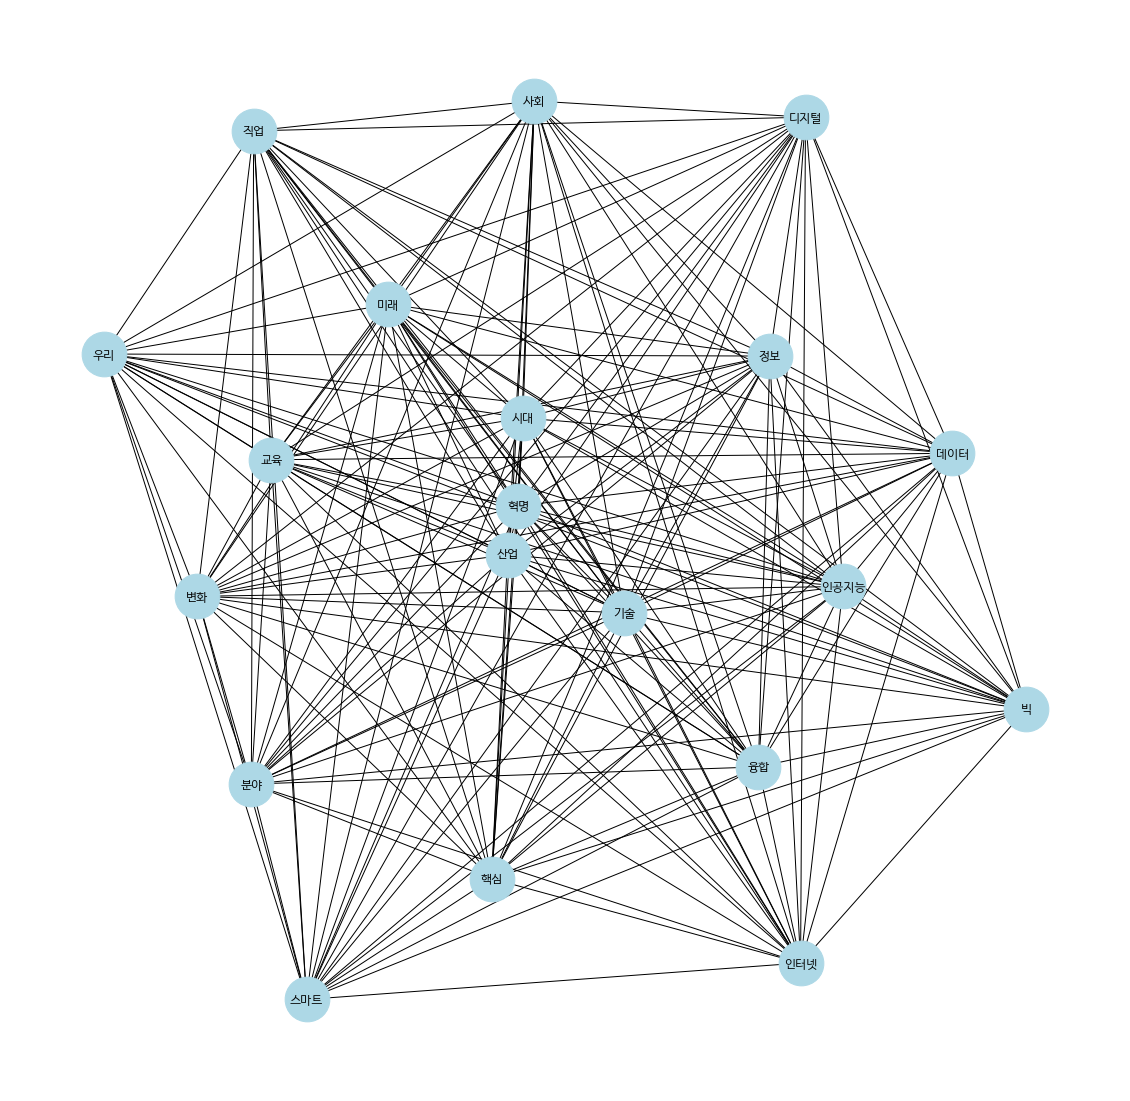

In [12]:
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm
from matplotlib import rc

font_path="C:/Windows/Fonts/Hancom Gothic Bold.ttf"
font_name = fm.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

fig = plt.figure()
fig.set_size_inches(20, 20)
ax = fig.add_subplot(1, 1, 1)
ax.axis("off")
option = {
    'node_color' : 'lightblue',
    'node_size' : 2000
}
nx.draw(network, labels=id2word, 
        font_family=font_name, ax=ax, **option)

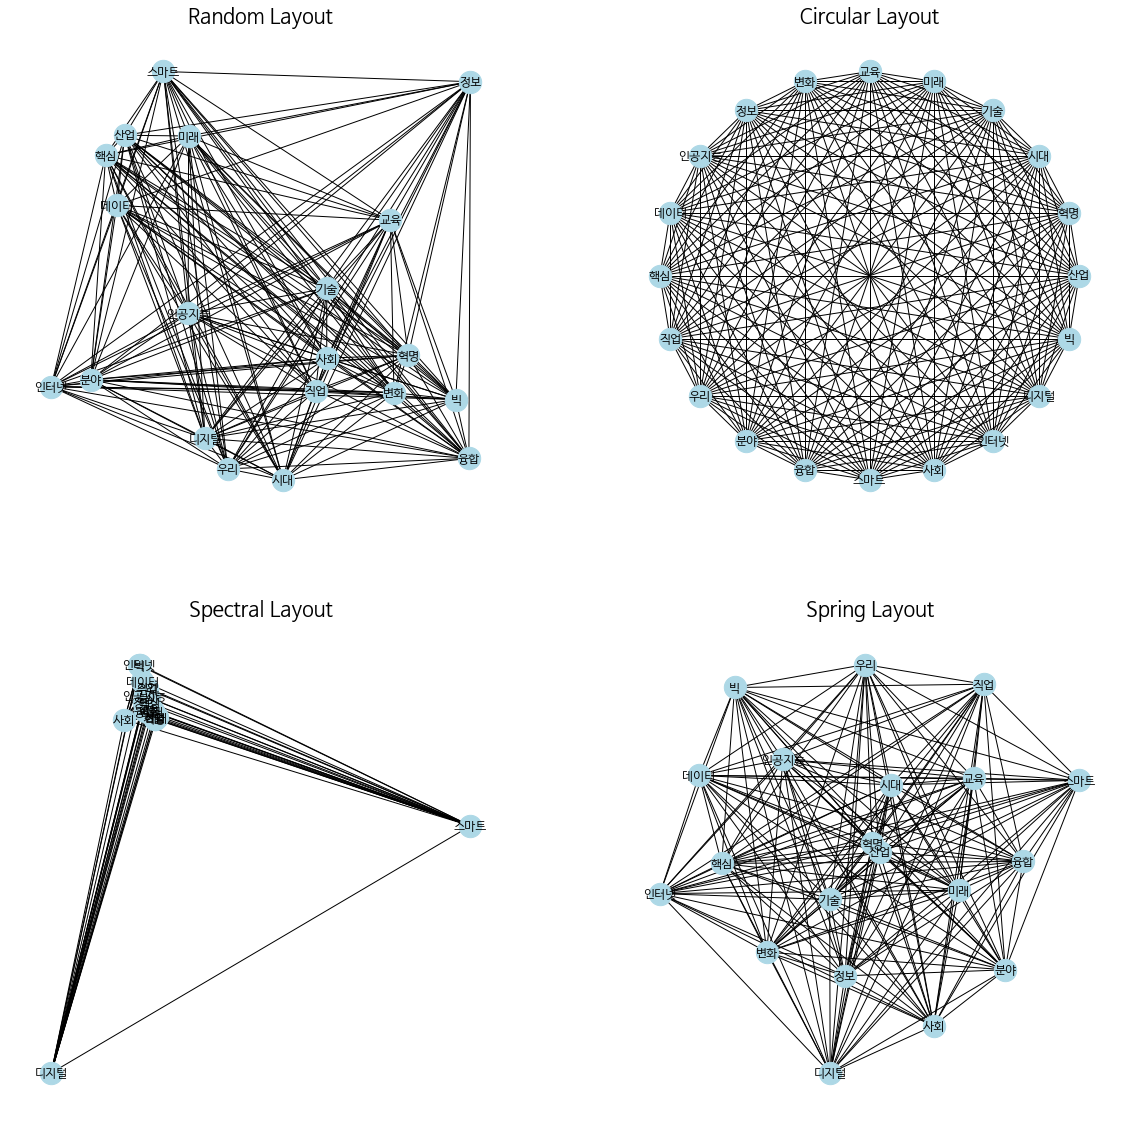

In [13]:
fig = plt.figure()
fig.set_size_inches(20, 20)
option = {
    'node_color' : 'lightblue',
    'node_size' : 500
}

plt.subplot(221)
plt.title('Random Layout', fontsize=20)
nx.draw_random(network, labels=id2word, font_family=font_name, **option)
plt.subplot(222)
plt.title('Circular Layout', fontsize=20)
nx.draw_circular(network, labels=id2word, font_family=font_name, **option)
plt.subplot(223)
plt.title('Spectral Layout',fontsize=20)
nx.draw_spectral(network, labels=id2word, font_family=font_name, **option)
plt.subplot(224)
plt.title('Spring Layout',fontsize=20)
nx.draw_spring(network, labels=id2word, font_family=font_name, **option)

In [14]:
#degree
nx.degree_centrality(network)

{0: 1.0,
 1: 1.0,
 2: 1.0,
 3: 1.0,
 4: 1.0,
 5: 1.0,
 6: 1.0,
 7: 1.0,
 8: 1.0,
 9: 1.0,
 10: 1.0,
 11: 1.0,
 12: 1.0,
 13: 1.0,
 14: 1.0,
 15: 1.0,
 16: 1.0,
 17: 1.0,
 18: 1.0,
 19: 1.0}

In [15]:
#eigenvector
nx.eigenvector_centrality(network, weight='weight')

{0: 0.625035566586455,
 1: 0.6193255737308943,
 2: 0.3142919240393204,
 3: 0.2055714095802922,
 4: 0.1144242318245854,
 5: 0.10412842228849667,
 6: 0.08884334885357505,
 7: 0.08168197341297556,
 8: 0.08200680950497828,
 9: 0.06499813767993619,
 10: 0.07788686044564039,
 11: 0.06494579031859135,
 12: 0.06752618456728626,
 13: 0.06083863990040292,
 14: 0.06694961168537736,
 15: 0.04648469063848459,
 16: 0.05161066848347837,
 17: 0.051105996824261216,
 18: 0.04772980427522129,
 19: 0.05034504321945146}

In [16]:
#closeness
nx.closeness_centrality(network, distance='weight')

{0: 0.010242587601078167,
 1: 0.010801591813530414,
 2: 0.0296875,
 3: 0.02909647779479326,
 4: 0.05740181268882175,
 5: 0.054441260744985676,
 6: 0.04810126582278481,
 7: 0.05539358600583091,
 8: 0.054441260744985676,
 9: 0.05337078651685393,
 10: 0.05413105413105413,
 11: 0.06462585034013606,
 12: 0.059748427672955975,
 13: 0.05367231638418079,
 14: 0.05121293800539083,
 15: 0.06484641638225255,
 16: 0.06031746031746032,
 17: 0.06333333333333334,
 18: 0.06354515050167224,
 19: 0.0581039755351682}

In [17]:
#current flow closeness
nx.current_flow_closeness_centrality(network)

{0: 0.5263157894736842,
 1: 0.5263157894736842,
 2: 0.5263157894736842,
 3: 0.5263157894736842,
 4: 0.5263157894736842,
 5: 0.5263157894736842,
 6: 0.5263157894736842,
 7: 0.5263157894736842,
 8: 0.5263157894736842,
 9: 0.5263157894736842,
 10: 0.5263157894736842,
 11: 0.5263157894736842,
 12: 0.5263157894736842,
 13: 0.5263157894736842,
 14: 0.5263157894736842,
 15: 0.5263157894736842,
 16: 0.5263157894736842,
 17: 0.5263157894736842,
 18: 0.5263157894736842,
 19: 0.5263157894736842}

In [18]:
#current flow betweenness
nx.current_flow_betweenness_centrality(network)

{0: 0.050000000000000044,
 1: 0.050000000000000024,
 2: 0.05000000000000013,
 3: 0.05000000000000011,
 4: 0.050000000000000044,
 5: 0.05,
 6: 0.04999999999999998,
 7: 0.050000000000000065,
 8: 0.050000000000000086,
 9: 0.050000000000000024,
 10: 0.04999999999999998,
 11: 0.050000000000000044,
 12: 0.05,
 13: 0.050000000000000065,
 14: 0.050000000000000024,
 15: 0.050000000000000065,
 16: 0.050000000000000065,
 17: 0.05,
 18: 0.050000000000000065,
 19: 0.05000000000000006}

In [19]:
#communicability betweenness
nx.communicability_betweenness_centrality(network)

{0: 0.6127584843488914,
 1: 0.6127584843488914,
 2: 0.6127584843488914,
 3: 0.6127584843488914,
 4: 0.6127584843488914,
 5: 0.6127584843488914,
 6: 0.6127584843488914,
 7: 0.6127584843488914,
 8: 0.6127584843488914,
 9: 0.6127584843488914,
 10: 0.6127584843488914,
 11: 0.6127584843488914,
 12: 0.6127584843488914,
 13: 0.6127584843488914,
 14: 0.6127584843488914,
 15: 0.6127584843488914,
 16: 0.6127584843488914,
 17: 0.6127584843488914,
 18: 0.6127584843488914,
 19: 0.6127584843488914}